In [1]:
# Création et visualisation des fonctions d'appartenance floues pour "Distance_to_next_car"
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

EXERCICE 1

In [2]:
# Univers de discours
x = np.linspace(0, 30, 301)

In [3]:
# Définitions des fonctions d'appartenance
def trapmf(x, a, b, c, d):
    """Trapèze: support [a,d], plateau [b,c]"""
    y = np.zeros_like(x)
    # montée
    idx = (x >= a) & (x < b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    # plateau
    idx = (x >= b) & (x <= c)
    y[idx] = 1
    # descente
    idx = (x > c) & (x <= d)
    if d > c:
        y[idx] = (d - x[idx]) / (d - c)
    return np.clip(y, 0, 1)

def trimf(x, a, b, c):
    """Triangle: sommet en b, support [a,c]"""
    y = np.zeros_like(x)
    # montée
    idx = (x >= a) & (x <= b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    # descente
    idx = (x >= b) & (x <= c)
    if c > b:
        y[idx] = (c - x[idx]) / (c - b)
    return np.clip(y, 0, 1)

In [4]:
# Paramètres choisis pour couvrir [0,30] avec recouvrement raisonnable
params = {
    "v_small": ("Trapèze", (0, 0, 2, 6)),
    "small":   ("Triangle",  (2, 6, 10)),
    "perfect": ("Triangle",  (8, 15, 22)),
    "big":     ("Triangle",  (18, 22, 26)),
    "v_big":   ("Trapèze", (24, 28, 30, 30))
}

In [5]:
# Calcul des valeurs d'appartenance
mf = {}
for name, (kind, p) in params.items():
    if kind == "Trapèze":
        mf[name] = trapmf(x, *p)
    else:
        mf[name] = trimf(x, *p)


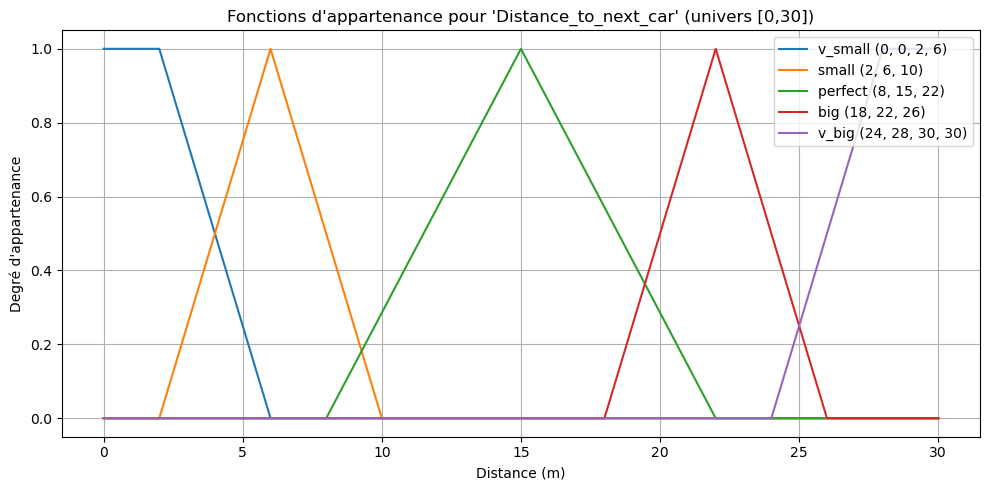

Paramètres choisis pour chaque ensemble flou :
v_small: Trapèze avec paramètres (0, 0, 2, 6)
small: Triangle avec paramètres (2, 6, 10)
perfect: Triangle avec paramètres (8, 15, 22)
big: Triangle avec paramètres (18, 22, 26)
v_big: Trapèze avec paramètres (24, 28, 30, 30)


In [7]:
# Affichage
plt.figure(figsize=(10,5))
for name in ["v_small","small","perfect","big","v_big"]:
    plt.plot(x, mf[name], label=f"{name} {params[name][1]}")
plt.title("Fonctions d'appartenance pour 'Distance_to_next_car' (univers [0,30])")
plt.xlabel("Distance (m)")
plt.ylabel("Degré d'appartenance")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()


plt.show()

# Afficher les paramètres numériques de chaque ensemble flou
params_text = "\n".join([f"{name}: {params[name][0]} avec paramètres {params[name][1]}" for name in params])
print("Paramètres choisis pour chaque ensemble flou :\n" + params_text)

EXERCICE 2

In [8]:
# Univers de discours
x = np.linspace(-20, 20, 401)

# Définitions des fonctions d'appartenance
def trapmf1(x, a, b, c, d):
    """Trapèze: support [a,d], plateau [b,c]"""
    y = np.zeros_like(x)
    # montée
    idx = (x >= a) & (x < b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    # plateau
    idx = (x >= b) & (x <= c)
    y[idx] = 1
    # descente
    idx = (x > c) & (x <= d)
    if d > c:
        y[idx] = (d - x[idx]) / (d - c)
    return np.clip(y, 0, 1)

def trimf1(x, a, b, c):
    """Triangle: sommet en b, support [a,c]"""
    y = np.zeros_like(x)
    # montée
    idx = (x >= a) & (x <= b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    # descente
    idx = (x >= b) & (x <= c)
    if c > b:
        y[idx] = (c - x[idx]) / (c - b)
    return np.clip(y, 0, 1)

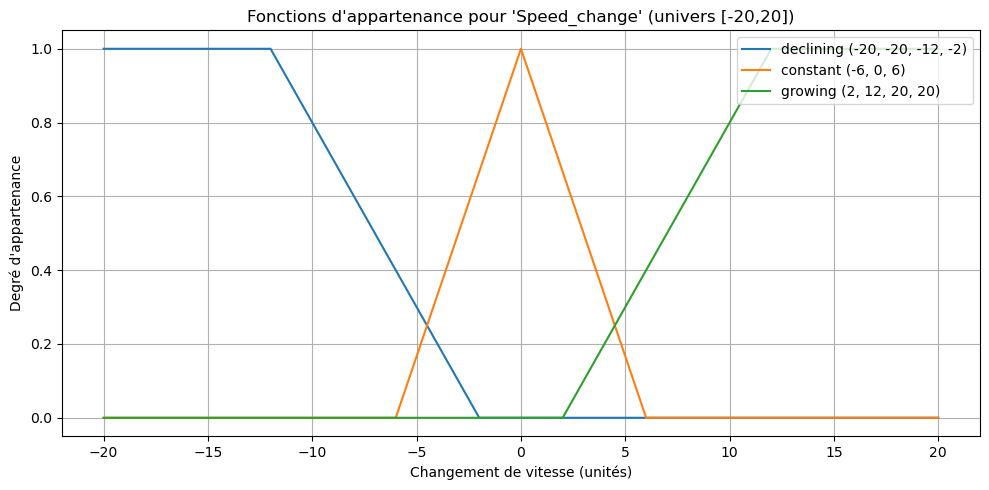

Paramètres choisis pour chaque ensemble flou :
declining: trap avec paramètres (-20, -20, -12, -2)
constant: tri avec paramètres (-6, 0, 6)
growing: trap avec paramètres (2, 12, 20, 20)


In [10]:
# Paramètres choisis
params = {
    "declining": ("trap", (-20, -20, -12, -2)),  # vitesse en diminution
    "constant":  ("tri",  (-6, 0, 6)),           # vitesse stable
    "growing":   ("trap", (2, 12, 20, 20))       # vitesse en augmentation
}

# Calcul des valeurs d'appartenance
mf = {}
for name, (kind, p) in params.items():
    if kind == "trap":
        mf[name] = trapmf(x, *p)
    else:
        mf[name] = trimf(x, *p)

# Affichage
plt.figure(figsize=(10,5))
plt.plot(x, mf["declining"], label=f"declining {params['declining'][1]}")
plt.plot(x, mf["constant"],  label=f"constant {params['constant'][1]}")
plt.plot(x, mf["growing"],   label=f"growing {params['growing'][1]}")
plt.title("Fonctions d'appartenance pour 'Speed_change' (univers [-20,20])")
plt.xlabel("Changement de vitesse (unités)")
plt.ylabel("Degré d'appartenance")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

plt.show()

# Afficher les paramètres numériques
params_text = "\n".join([f"{name}: {params[name][0]} avec paramètres {params[name][1]}" for name in params])
print("Paramètres choisis pour chaque ensemble flou :\n" + params_text)



EXERCICE 3

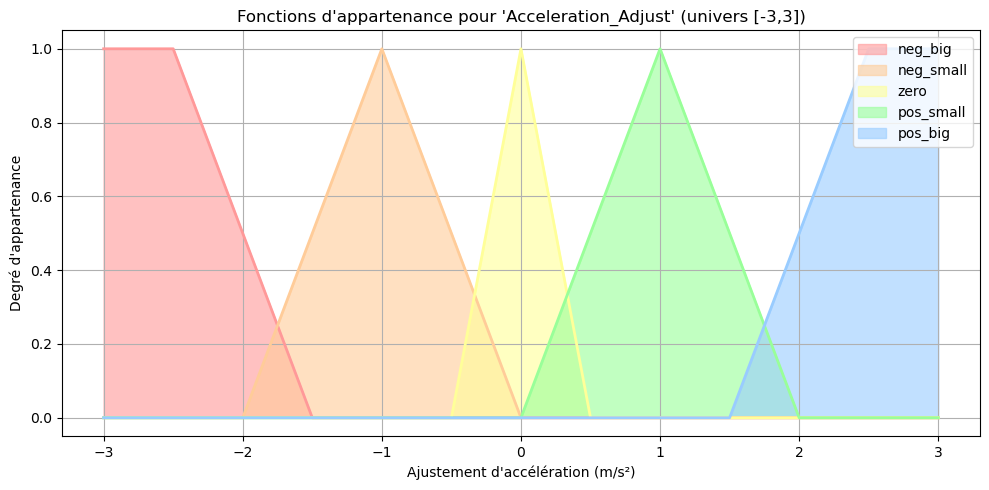

Paramètres choisis pour chaque ensemble flou :
neg_big: trap avec paramètres (-3, -3, -2.5, -1.5)
neg_small: tri avec paramètres (-2, -1, 0)
zero: tri avec paramètres (-0.5, 0, 0.5)
pos_small: tri avec paramètres (0, 1, 2)
pos_big: trap avec paramètres (1.5, 2.5, 3, 3)


In [11]:
# Création et visualisation colorée des ensembles flous pour "Acceleration_Adjust"
import numpy as np
import matplotlib.pyplot as plt

# Univers de discours
x = np.linspace(-3, 3, 301)

# Fonctions d'appartenance
def trapmf(x, a, b, c, d):
    y = np.zeros_like(x)
    idx = (x >= a) & (x < b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    idx = (x >= b) & (x <= c)
    y[idx] = 1
    idx = (x > c) & (x <= d)
    if d > c:
        y[idx] = (d - x[idx]) / (d - c)
    return np.clip(y, 0, 1)

def trimf(x, a, b, c):
    y = np.zeros_like(x)
    idx = (x >= a) & (x <= b)
    if b > a:
        y[idx] = (x[idx] - a) / (b - a)
    idx = (x >= b) & (x <= c)
    if c > b:
        y[idx] = (c - x[idx]) / (c - b)
    return np.clip(y, 0, 1)

# Paramètres des ensembles flous
params = {
    "neg_big":   ("trap", (-3, -3, -2.5, -1.5)),  # forte décélération
    "neg_small": ("tri",  (-2, -1, 0)),           # faible décélération
    "zero":      ("tri",  (-0.5, 0, 0.5)),        # aucune variation
    "pos_small": ("tri",  (0, 1, 2)),             # faible accélération
    "pos_big":   ("trap", (1.5, 2.5, 3, 3))       # forte accélération
}

# Calcul des degrés d'appartenance
mf = {}
for name, (kind, p) in params.items():
    if kind == "trap":
        mf[name] = trapmf(x, *p)
    else:
        mf[name] = trimf(x, *p)

# Couleurs pour visualisation
colors = {
    "neg_big": "#ff9999",   # rouge clair
    "neg_small": "#ffcc99", # orange clair
    "zero": "#ffff99",      # jaune
    "pos_small": "#99ff99", # vert clair
    "pos_big": "#99ccff"    # bleu clair
}

# Tracé coloré
plt.figure(figsize=(10,5))
for name in ["neg_big","neg_small","zero","pos_small","pos_big"]:
    plt.plot(x, mf[name], color=colors[name], linewidth=2)
    plt.fill_between(x, 0, mf[name], color=colors[name], alpha=0.6, label=name)

plt.title("Fonctions d'appartenance pour 'Acceleration_Adjust' (univers [-3,3])")
plt.xlabel("Ajustement d'accélération (m/s²)")
plt.ylabel("Degré d'appartenance")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

plt.show()

# Afficher les paramètres
params_text = "\n".join([f"{name}: {params[name][0]} avec paramètres {params[name][1]}" for name in params])
print("Paramètres choisis pour chaque ensemble flou :\n" + params_text)


EXERCICE 4

Valeur de sortie (Acceleration_Adjust) = 0.189


C:\Users\pc\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


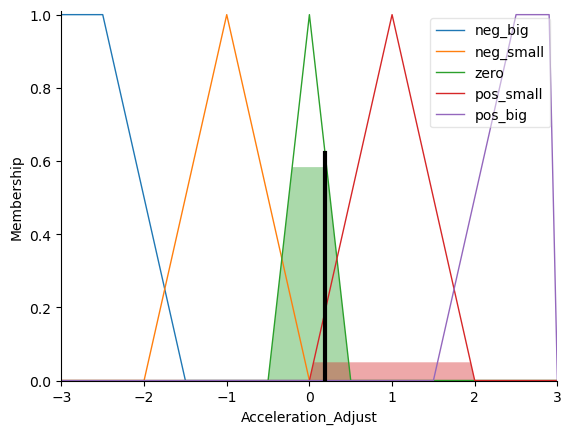

In [14]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# -----------------------------
#  Définition des variables floues
# -----------------------------
Distance_to_next_car = ctrl.Antecedent(np.arange(0, 31, 1), 'Distance_to_next_car')
Speed_change = ctrl.Antecedent(np.arange(-20, 21, 1), 'Speed_change')
Acceleration_Adjust = ctrl.Consequent(np.arange(-3, 3.1, 0.1), 'Acceleration_Adjust')

# -----------------------------
# Fonctions d’appartenance
# -----------------------------
Distance_to_next_car['v_small'] = fuzz.trapmf(Distance_to_next_car.universe, [0, 0, 2, 6])
Distance_to_next_car['small']   = fuzz.trimf(Distance_to_next_car.universe, [2, 6, 10])
Distance_to_next_car['perfect'] = fuzz.trimf(Distance_to_next_car.universe, [8, 15, 22])
Distance_to_next_car['big']     = fuzz.trimf(Distance_to_next_car.universe, [18, 22, 26])
Distance_to_next_car['v_big']   = fuzz.trapmf(Distance_to_next_car.universe, [24, 28, 30, 30])

Speed_change['declining'] = fuzz.trapmf(Speed_change.universe, [-20, -20, -12, -2])
Speed_change['constant']  = fuzz.trimf(Speed_change.universe, [-6, 0, 6])
Speed_change['growing']   = fuzz.trapmf(Speed_change.universe, [2, 12, 20, 20])

Acceleration_Adjust['neg_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [-3, -3, -2.5, -1.5])
Acceleration_Adjust['neg_small'] = fuzz.trimf(Acceleration_Adjust.universe, [-2, -1, 0])
Acceleration_Adjust['zero']      = fuzz.trimf(Acceleration_Adjust.universe, [-0.5, 0, 0.5])
Acceleration_Adjust['pos_small'] = fuzz.trimf(Acceleration_Adjust.universe, [0, 1, 2])
Acceleration_Adjust['pos_big']   = fuzz.trapmf(Acceleration_Adjust.universe, [1.5, 2.5, 3, 3])

# -----------------------------
#  Définition de la base de règles
# -----------------------------
rules = [
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'],  Acceleration_Adjust['neg_big']),
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'],   Acceleration_Adjust['neg_big']),

    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['declining'], Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['constant'],  Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['growing'],   Acceleration_Adjust['neg_big']),

    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'],  Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'],   Acceleration_Adjust['neg_small']),

    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['declining'], Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['constant'],  Acceleration_Adjust['pos_small']),
    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['growing'],   Acceleration_Adjust['zero']),

    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['declining'], Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['constant'],  Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['growing'],   Acceleration_Adjust['pos_small'])
]

# -----------------------------
#  Création du système de contrôle
# -----------------------------
speed_ctrl = ctrl.ControlSystem(rules)
simulation = ctrl.ControlSystemSimulation(speed_ctrl)

# -----------------------------
#  Simulation : valeurs d'entrée
# -----------------------------
simulation.input['Distance_to_next_car'] = 13
simulation.input['Speed_change'] = -2.5

# Calcul de la défuzzification
simulation.compute()

# -----------------------------
# Résultat
# -----------------------------
print(f"Valeur de sortie (Acceleration_Adjust) = {simulation.output['Acceleration_Adjust']:.3f}")

# -----------------------------
# Visualisation du résultat de la défuzzification
# -----------------------------
Acceleration_Adjust.view(sim=simulation)
plt.show()


In [13]:
!pip install scikit-fuzzy


   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   -